# Spaceship Titanic

Predict which passengers are transported to an alternate dimension ( Kaggle competition )

Link to competition : https://www.kaggle.com/competitions/spaceship-titanic/overview

# Data

There is version of data on Kaggle : https://www.kaggle.com/competitions/spaceship-titanic/data

# Evaluation

Submission to Kaggle evaluated based on classification accuracy

# Features

1. PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp
where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
2. HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
3. CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
4. Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
5. Destination - The planet the passenger will be debarking to.
6. Age - The age of the passenger.
7. VIP - Whether the passenger has paid for special VIP service during the voyage.
8. RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
9. Name - The first and last names of the passenger.
10. Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.




In [25]:
#Regular EDA and plotting libraries
import pandas as pd
import seaborn as sns
import numpy as np
#Model evaluations
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
#Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

Load data

In [2]:
#Train data
train_data = pd.read_csv("/content/drive/MyDrive/spaceship-titanic/train.csv")
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


Data exploration

In [3]:
train_data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [5]:
#Checking the missing data from the dataset
train_data.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

<ipython-input-6-769f86d170eb>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot = True, linewidths = 1, linecolor = 'white', cmap = 'crest');


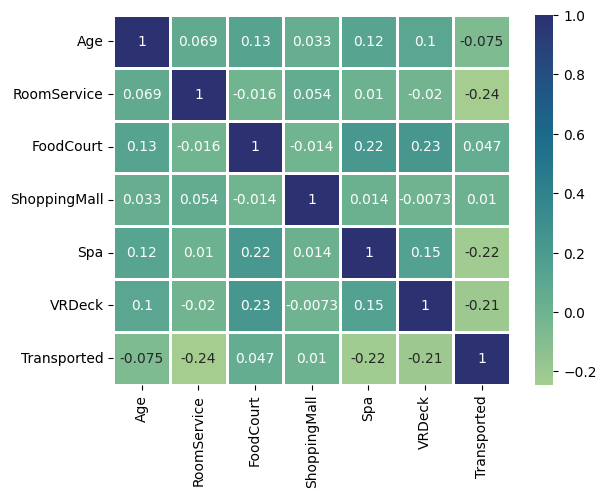

In [6]:
#Train data correlation
sns.heatmap(train_data.corr(), annot = True, linewidths = 1, linecolor = 'white', cmap = 'crest');

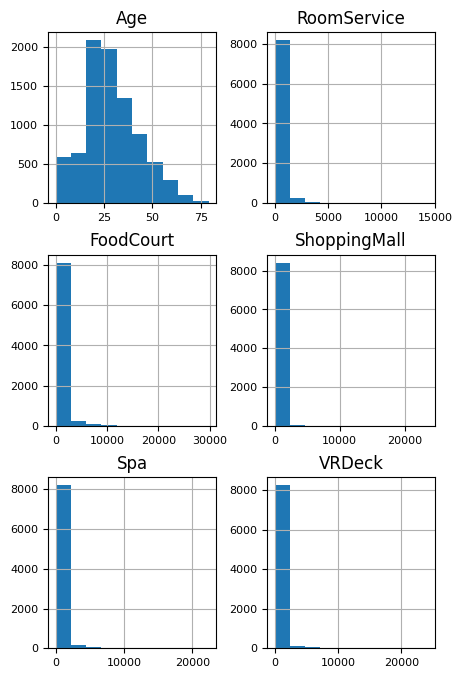

In [7]:
train_data.hist(figsize = (5,8), xlabelsize = 8, ylabelsize = 8);

Preprocess data

In [8]:
#First we have to change the boolean,string and categorical values from datasets to numeric value
def preprocess_train_data(train_data):
    for label, content in train_data.items():
        if pd.api.types.is_string_dtype(content):
            train_data[label]=content.astype("category").cat.as_ordered()
    for label, content in train_data.items():
        if not pd.api.types.is_numeric_dtype(content):
            train_data[label] = pd.Categorical(content).codes+1
    for label, content in train_data.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                train_data[label] = content.fillna(content.median())
    return train_data

In [9]:
pd_train_data = preprocess_train_data(train_data)
pd_train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,1,2,1,150,3,39.0,1,0.0,0.0,0.0,0.0,0.0,5253,False
1,2,1,1,2185,3,24.0,1,109.0,9.0,25.0,549.0,44.0,4503,True
2,3,2,1,2,3,58.0,2,43.0,3576.0,0.0,6715.0,49.0,458,False
3,4,2,1,2,3,33.0,1,0.0,1283.0,371.0,3329.0,193.0,7150,False
4,5,1,1,2187,3,16.0,1,303.0,70.0,151.0,565.0,2.0,8320,True


Modelling

In [10]:
X = pd_train_data.drop("Transported", axis = 1)
y = pd_train_data["Transported"]

In [11]:
X.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,1,2,1,150,3,39.0,1,0.0,0.0,0.0,0.0,0.0,5253
1,2,1,1,2185,3,24.0,1,109.0,9.0,25.0,549.0,44.0,4503
2,3,2,1,2,3,58.0,2,43.0,3576.0,0.0,6715.0,49.0,458
3,4,2,1,2,3,33.0,1,0.0,1283.0,371.0,3329.0,193.0,7150
4,5,1,1,2187,3,16.0,1,303.0,70.0,151.0,565.0,2.0,8320


In [12]:
y.head()

0    False
1     True
2    False
3    False
4     True
Name: Transported, dtype: bool

In [13]:
#Splitting the data to validation and train
X_train, X_val, y_train, y_val = train_test_split( X, y, test_size = 0.2, random_state = 42)

In [14]:
models = {"Logistic Regression" : LogisticRegression(),
          "Random Forest" : RandomForestClassifier(),
          "KNN" : KNeighborsClassifier()}
def fit_and_score(models, X_train, X_val, y_train, y_val):
  np.random.seed(42)
  model_scores={}
  for name, model in models.items():
    model.fit(X_train,y_train)
    model_scores[name] = model.score(X_val,y_val)
  return model_scores

In [15]:
model_scores = fit_and_score(models = models,
                             X_train = X_train,
                             X_val = X_val,
                             y_train = y_train,
                             y_val = y_val)
model_scores

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.7630822311673375,
 'Random Forest': 0.7849338700402531,
 'KNN': 0.7211040828062104}

Model Comparison

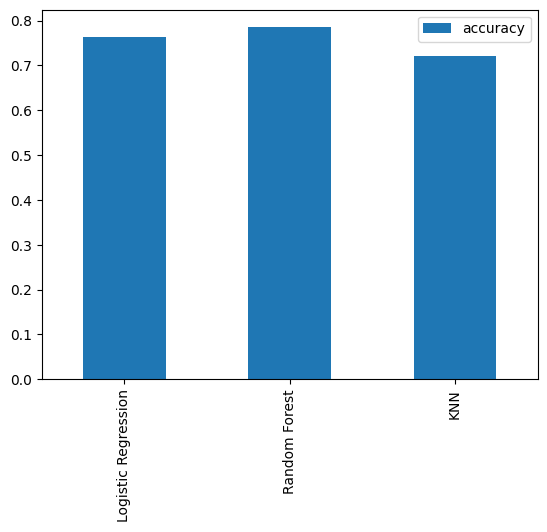

In [16]:
models_compare = pd.DataFrame(model_scores, index = ["accuracy"])
models_compare.T.plot.bar();

Hyperparameter tuning with RandomizedSearchCV

In [17]:
randomforest_grid = {"n_estimators" : np.arange(10, 1000, 50),
                     "max_depth" : [None, 3, 5, 10],
                     "min_samples_split" : np.arange(2, 20, 2),
                     "min_samples_leaf" : np.arange(1, 20, 2)}

In [18]:
np.random.seed(42)

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions = randomforest_grid,
                           cv = 5,
                           n_iter = 20,
                           verbose = True)
rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [19]:
rs_rf.best_params_

{'n_estimators': 910,
 'min_samples_split': 18,
 'min_samples_leaf': 1,
 'max_depth': 10}

In [20]:
#Accuracy of RandomForest after using hyperparamter is same, we will try use hyperparamter for LogisticRegression
rs_rf.score(X_val, y_val)

0.7889591719378953

In [21]:
#Tune LogisticRegression
log_reg_grid = {"C" : np.logspace(-4,4,20),
                "solver" : ["liblinear"]}
np.random.seed(42)

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions = log_reg_grid,
                                cv = 5,
                                n_iter = 20,
                                verbose = True)
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [22]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.004832930238571752}

In [23]:
#After tune of LogisticRegression and increased little bit
rs_log_reg.score(X_val,y_val)

0.7751581368602645

Testing our model in test data (RandomForest model)

In [43]:
#Test data
test_data = pd.read_csv("/content/drive/MyDrive/spaceship-titanic/test.csv")
test_data.head()
testdatastring = test_data.copy()

In [29]:
#Correct the test data as train data
pd_test_data = preprocess_train_data(test_data)
pd_test_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,1,1,2,2785,3,27.0,1,0.0,0.0,0.0,0.0,0.0,2913
1,2,1,1,1868,3,19.0,1,0.0,9.0,0.0,2823.0,0.0,2407
2,3,2,2,258,1,31.0,1,0.0,0.0,0.0,0.0,0.0,3377
3,4,2,1,260,3,38.0,1,0.0,6652.0,0.0,181.0,585.0,2712
4,5,1,1,1941,3,20.0,1,10.0,0.0,635.0,0.0,0.0,669


In [ ]:
#Submission file format to Kaggle
sample_submission = pd.read_csv("/content/drive/MyDrive/spaceship-titanic/sample_submission.csv")
sample_submission.head()

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False


In [31]:
#Prediction the target
test_preds = rs_rf.predict(test_data)
test_preds

array([ True, False,  True, ...,  True,  True,  True])

In [44]:
data_preds = pd.DataFrame()
data_preds["PassengerId"] = testdatastring["PassengerId"]
data_preds["Transported"] = test_preds
data_preds

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [47]:
data_preds.to_csv("/content/drive/MyDrive/spaceship-titanic/test_preds.csv", index = False)